# Dados Macro

## Chave e importação de bibliotecas

In [1]:
chave = "_ysJGNioPzKbu3XFav-e"

In [52]:
# Importando

import nasdaqdatalink
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
import numpy as np
from bcb import sgs
import seaborn as sns

In [3]:
# Config 

nasdaqdatalink.ApiConfig.api_key = chave

## Juros reais EUA

In [4]:
juros_reais_EUA = nasdaqdatalink.get("FRED/EFFR")

In [5]:
juros_reais_EUA

,Value
Date,
2000-07-03,7.03
2000-07-05,6.52
2000-07-06,6.51
2000-07-07,6.42
2000-07-10,6.51
...,...
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58


In [6]:
type(juros_reais_EUA)

pandas.core.frame.DataFrame

In [7]:
# Limitar a data

juros_reais_EUA = nasdaqdatalink.get("FRED/EFFR", start_date = "2022-01-01", end_date = "2022-08-20")

In [8]:
juros_reais_EUA

,Value
Date,
2022-01-03,0.08
2022-01-04,0.08
2022-01-05,0.08
2022-01-06,0.08
2022-01-07,0.08
...,...
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58


In [9]:
# Collapse -> Traz como definir (ex: mensal)

juros_reais_EUA = nasdaqdatalink.get("FRED/EFFR", collapse = "monthly")

In [10]:
juros_reais_EUA

,Value
Date,
2000-07-31,6.64
2000-08-31,6.65
2000-09-30,6.60
2000-10-31,6.59
2000-11-30,6.62
...,...
2022-03-31,0.33
2022-04-30,0.33
2022-05-31,0.83


In [11]:
juros_reais_EUA.index

DatetimeIndex(['2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
               '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28',
               '2001-03-31', '2001-04-30',
               ...
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31'],
              dtype='datetime64[ns]', name='Date', length=265, freq=None)

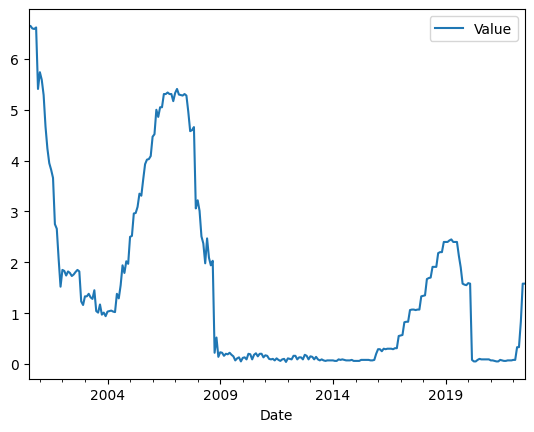

In [12]:
juros_reais_EUA.plot();

## Taxa Selic

* Tentei usar nasdaqlink, mas não tinha mais os dados do BCB, logo usei a biblioteca bcb 

* Instalar com "pip install python-bcb"

In [13]:
from bcb import sgs

In [14]:
selic = sgs.get({"selic": 432}, start = "2000-01-01")

In [15]:
selic

,selic
Date,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2023-10-21,12.75
2023-10-22,12.75
2023-10-23,12.75


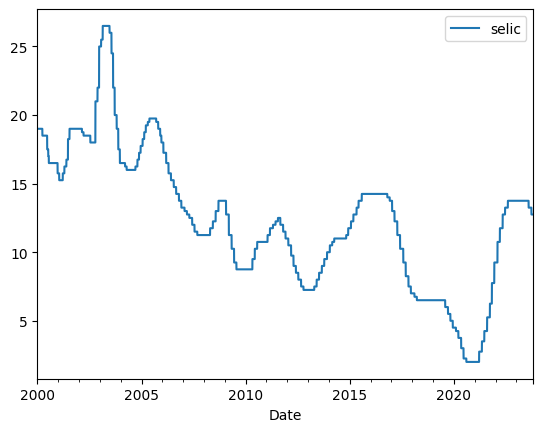

In [16]:
# Gráfico bem base

selic.plot();

In [17]:
# Gráfico mais elaborado (com plotly)

fig = go.Figure()
fig.add_trace(go.Scatter(name = "SELIC", x = selic.index, y = selic["selic"]))
fig.show()

## Indicadores de inflação

### IPCA Acumulado

In [18]:
ipca_acumulado = sgs.get({"valor": 13522}, start = "2000-01-01")

In [19]:
ipca_acumulado

,valor
Date,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2023-05-01,3.94
2023-06-01,3.16
2023-07-01,3.99


In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(name = "IPCA", x = ipca_acumulado.index, y = ipca_acumulado["valor"]))
fig.update_layout(title_text = "IPCA Acumulado 12M")
fig.show()

### IPCA - Preços administrados 

* BCB/4447 - Bens comercializáveis

* BCB/4448 - Bens não comercializáveis

* BCB/4449 - Administrados


In [21]:
ipca_adm = sgs.get({"ipca_adm": 4449}, start = '2000-01-01')

In [22]:
# Fazendo o gráfico da variação, mas em barras

fig = go.Figure()
fig.add_trace(go.Bar(name='IPCA_ADM', x=ipca_adm.index, y=ipca_adm["ipca_adm"]))
fig.show()

### IGPM

In [23]:
igpm = sgs.get({"igpm": 189}, start = "2000-01-01")

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(name = "IGPM", x = igpm.index, y = igpm["igpm"]))
fig.show()

### INCC

In [25]:
incc = sgs.get({"incc": 192}, start = "2000-01-01")

In [26]:
incc

,incc
Date,
2000-01-01,1.07
2000-02-01,0.77
2000-03-01,0.56
2000-04-01,0.60
2000-05-01,1.35
...,...
2023-05-01,0.59
2023-06-01,0.71
2023-07-01,0.10


In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(name="INCC", x = incc.index, y = incc["incc"]))
fig.show()

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(name = "IPCA", x = ipca_acumulado.index, y = ipca_acumulado["valor"]))
fig.add_trace(go.Scatter(name = "SELIC", x = selic.index, y = selic["selic"]))
fig.update_layout(title_text = "IPCA Acumulado 12M")
fig.show()

## PIB


In [30]:
#PIB em dólar

pib_usd = nasdaqdatalink.get('ODA/BRA_NGDPD', start_date='2000-01-01')

fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB_USD', x=pib_usd.index, y=pib_usd.Value))
fig.show()

## Índice de confiança

* Sondagem de Serviços

In [31]:
sondagem_serv = sgs.get({"sondagem": 20339}, start = '2000-01-01')

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(name="Sondagem de Serviços", x = sondagem_serv.index, y = sondagem_serv["sondagem"]))
fig.show()

* Índice de confiança do consumidor

In [37]:
indice_consumidor = sgs.get({"indice": 4393}, start= "2000-01-01")

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(name = "Índice de Confiança do Consumidor", x = indice_consumidor.index, y = indice_consumidor["indice"]))
fig.show()

## Dólar

In [49]:
dolar = sgs.get({"dolar": 10813}, start="2000-01-01")

In [50]:
dolar

,dolar
Date,
1999-12-31,1.7882
2000-01-03,1.8003
2000-01-04,1.8329
2000-01-05,1.8536
2000-01-06,1.8453
...,...
2023-10-19,5.0534
2023-10-20,5.0522
2023-10-23,5.0158


In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(name="Dólar", x = dolar.index, y = dolar["dolar"]))
fig.show()

## Análise: Correlação entre os indicadores macroeconômicos

In [53]:
# Criar os DataFrames vazios

selic2 = pd.DataFrame()

In [61]:
selic2 = sgs.get({"selic": 432}, start = "2000-01-01", end = "2022-12-31", freq="M")

In [62]:
selic2

,selic
Date,
2000-01,19.00
2000-01,19.00
2000-01,19.00
2000-01,19.00
2000-01,19.00
...,...
2022-12,13.75
2022-12,13.75
2022-12,13.75
